In [1]:
import sys, os, subprocess
import matplotlib.pyplot as plt
# adjust some settings for matplotlib
from matplotlib import rcParams
import numpy as np
import scipy
import scipy.fftpack
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.utils.helper import strike_dip_vector
from LoopStructural import GeologicalModel
import LoopStructural
import pandas as pd
# print rcParams
rcParams['font.size'] = 15
# determine path of repository to set paths corretly below
repo_path = os.path.realpath('../..')
sys.path.append(repo_path)
import pynoddy.history
import logging
logging.getLogger().setLevel(logging.INFO)

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [7]:
df2.to_csv('faulted_type1.csv')

In [8]:
os.getcwd()

'/home/lgrose/dev/python/LoopStructuralWorkshop/notebooks'

In [2]:
df2 = pd.read_pickle("type1_faulted.pkl")
bb = np.zeros((2,3))
bb[1,:] =(10000.0, 7000.0, 5000.0)

In [3]:
from scipy.sparse import diags
def diagprecon(A):
    M = diags(A.diagonal())
    return M

In [4]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(df2)
fault = model.create_and_add_fault('fault',
                                   -500,
                                   nelements=1e4,
                                   interpolatottype='PLI',
                                   buffer=0.7,
                                   solver='lu'
                                  )
fold_frame = model.create_and_add_fold_frame('s1',
                                nelements=1e4,
                                            regularisation=[1.,1.,.1],
                                            interpolatortype='PLI',
#                                             gxxgy=0.,
                                            solver='lu',
                                            damp=True,
                                            buffer=0.7)
# fault = model.create_and_add_folded_fold_frame('fault',
#                                       nelements=1e5,
#                                               limb_wl=wl/10000,
#                                                regularisation=[1.,1.,1.],
# #                                                gxxgy=5.1,
#                                       av_fold_axis='True',
#                                       solver='lu')
s0 = model.create_and_add_folded_foliation('s0',
                                           fold_frame=fold_frame['feature'],
                                      nelements=1e4,
#                                            limb_wl=10,
#                                      av_fold_axis='True',
                                          solver='lu',
#                                            maxiter=200,
#                                            tol=1e-10,
                                           precon=diagprecon,
#                                            axis_wl=10,
                                          buffer=0.5,
                                          damp=True)


11:30:29 INFO:Creating regular tetrahedron mesh with 25500 elements 
for modelling using PLI
11:30:29 INFO:Building fault coordinate 0
11:30:29 INFO:Adding 0 faults to fault_0
11:30:29 INFO:Setting up PLI interpolator for fault_0
11:30:30 INFO:Using constant gradient regularisation w = 0.100000
11:30:30 INFO:Added 0 gradient constraints, 40 normal constraints,0 tangent constraints and 2 value constraintsto fault_0
11:30:30 INFO:Interpolation matrix is 49332 x 6048
11:30:30 INFO:Adding eps to matrix diagonal
11:30:30 INFO:Solving using scipy LU
11:30:31 INFO:Building fault coordinate 2
11:30:31 INFO:Adding 0 faults to fault_2
11:30:31 INFO:Setting up PLI interpolator for fault_2
11:30:31 INFO:Using constant gradient regularisation w = 0.100000
11:30:31 INFO:Added 0 gradient constraints, 0 normal constraints,0 tangent constraints and 2 value constraintsto fault_2
11:30:31 INFO:Interpolation matrix is 74712 x 6048
11:30:31 INFO:Adding eps to matrix diagonal
11:30:31 INFO:Solving using sci

11:31:00 INFO:Adding vector field for s1_1 
11:31:03 INFO:Creating isosurface of s1_1 at 0.000000
11:31:03 INFO:Adding scalar field of s0 to viewer. Min: 0.001634, max: 0.108400
11:31:07 INFO:Creating isosurface of s0 at 0.059387



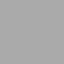

In [5]:
viewer = LavaVuModelViewer(model)
# # # fold_frame['feature'][0].faults_enabled = True
# # viewer.add_isosurface(fold_frame['feature'][0],
# # #                      nslices=10
# #                      )
viewer.add_vector_field(fold_frame['feature'][1],
                       locations=s0['feature'].builder.interpolator.get_gradient_constraints()[:,:3]
                       )
# # #                      nslices=10
                        
                        
#                      )

viewer.add_isosurface(fold_frame['feature'][1],
                     isovalue=0)
# viewer.add_isosurface(fold_frame['feature'][1],
#                      isovalue=0)
# viewer.add_isosurface(fault['feature'][0],
#                      isovalue=0)
viewer.add_data(fold_frame['feature'][1])
# model.data[model.data['type'] == 's0']
# viewer.add_points(model.data[model.data['type'] == 's0'][['X','Y','Z']].to_numpy(),name='test',pointsize=10)
viewer.add_scalar_field(s0['feature'],cmap='tab20')
# viewer.add_data(fault['feature'][0])
# # s0['feature'].faults = []
viewer.add_isosurface(s0['feature'])
viewer.add_data(s0['feature'])
# viewer.add_fold(s0['fold'],locations=model.regular_grid()[::50])
# viewer.add_vector_field(fault['feature'][1],locations=model.regular_grid()[::50])
viewer.interactive()

In [ ]:
x = np.linspace(fold_frame['feature'][1].min(),fold_frame['feature'][1].max(),100)

plt.plot(s0['axis_direction'],s0['axis_rotation'],'bo')
plt.plot(x, s0['fold'].fold_axis_rotation(x),'b-')

plt.figure()
plt.plot(s0['axis_svariogram'].lags,s0['axis_svariogram'].variogram,'ko')

In [ ]:
x = np.linspace(fold_frame['feature'][0].min(),fold_frame['feature'][0].max(),100)

plt.plot(s0['foliation'],s0['limb_rotation'],'bo')
plt.plot(x, s0['fold'].fold_limb_rotation(x),'b-')

plt.figure()
plt.plot(s0['limb_svariogram'].lags,s0['limb_svariogram'].variogram,'ko')

(0.0, 0.7)

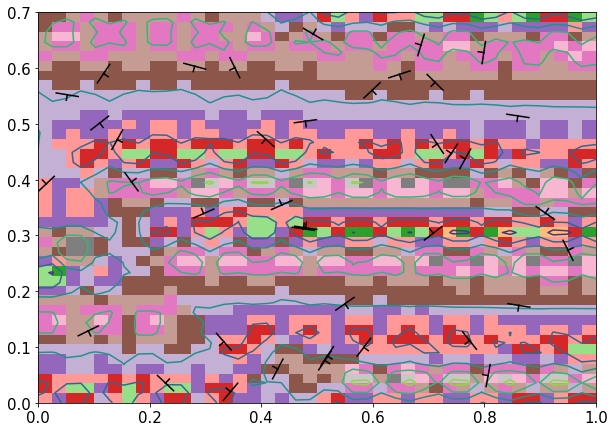

In [8]:
from LoopStructural.visualisation import MapView
mapview = MapView(model)
mapview.nsteps = np.array([40,40])
mapview.add_data(s0['feature'],scale=0.02)
mapview.add_scalar_field(s0['feature'],cmap='tab20')
mapview.add_contour(s0['feature'],4)

plt.xlim(model.bounding_box[0,0],model.bounding_box[1,0])
plt.ylim(model.bounding_box[0,1],model.bounding_box[1,1])